# PENNACHI CYPRIEN

## TP noté Maths pour l'IA: classifier des digits

Pour ce TP, vous aurez accès à vos cours et notes des précédents TPs. Normalement vous aurez tout ce qu'il faut.

Les digits sont des chiffres écrits à la main. Vous avez plusieurs fois le même chiffre qui pourra être écrit par différentes personnes, résultant en différentes images.

La tâche de classification de digits consiste à apprendre des modèles de digits connaissant le chiffre associé, et ensuite associer un digit inconnus avec un chiffre.
Pour cela, les digits vont être représentés sous forme de vecteurs, qui correspondent à la matrice de pixels dépliées. Les images d'origine font (16,16) en niveaux de gris, les vecteurs associés feront donc 256.

En phase de test, on récupère une image d'un digit. On détermine le vecteur de pixel associé et on va chercher l'identifiant (le chiffre) correspondant au vecteur du chiffre de l'ensemble d'apprentissage le plus similaire. On calculera un taux d'erreur suivant la distance utilisée à partir des identifiants des digits inconnus présent dans la partition de test.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Partie 1 : Analyse en composantes principales

Le vecteur qui représente un digit est de grande dimension (256). Pour accélérer les calculs, nous allons utiliser l'analyse en composantes principales pour réduire cette dimension.

Vous avez à votre disposition deux sous ensembles de digits, ainsi que les chiffres correspondants.

On vous donne une fonction `plot_digits` qui affiche 100 digits d'un ensemble `X`. Cette fonction vous permettra de visualiser les images correspondantes aux digits.

In [3]:
# chargement des données
train_ids = np.load("train_ids.npy")        #identifiants des digits du set d'apprentissage
train_digits = np.load("train_digits.npy")  #vecteurs des digits du set d'apprentissage

test_ids = np.load("test_ids.npy")          #identifiants des digits du set de test => pour vérifier
test_digits = np.load("test_digits.npy")    #vecteurs des digits du set de test

In [4]:
def plot_digits(X, title):
    """Small helper function to plot 100 digits."""
    fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(8, 8))
    for img, ax in zip(X, axs.ravel()):
        ax.imshow(img.reshape((16, 16)), cmap="Greys")
        ax.axis("off")
    fig.suptitle(title, fontsize=24)

In [34]:
train_ids[:100]

array([ 1,  2,  1,  3,  2,  5,  8,  9,  9,  1,  8,  3,  1,  3,  1,  2,  2,
        9,  5,  1,  4,  8,  2,  5,  3,  1,  1,  4,  3,  6,  3,  4,  1,  6,
       10,  8,  3,  2,  8,  7,  1,  9,  3,  1,  5,  1,  1,  1,  8,  2,  1,
        7,  2,  5,  7,  6, 10,  2,  1,  3,  9,  8,  3,  7,  3,  1,  9,  1,
        3, 10, 10,  1,  5,  8,  6,  7,  8,  2,  8, 10,  2,  1,  9,  7,  1,
        9,  2,  5,  7,  2,  3,  1,  5,  1,  5,  1,  7,  9,  1,  9])

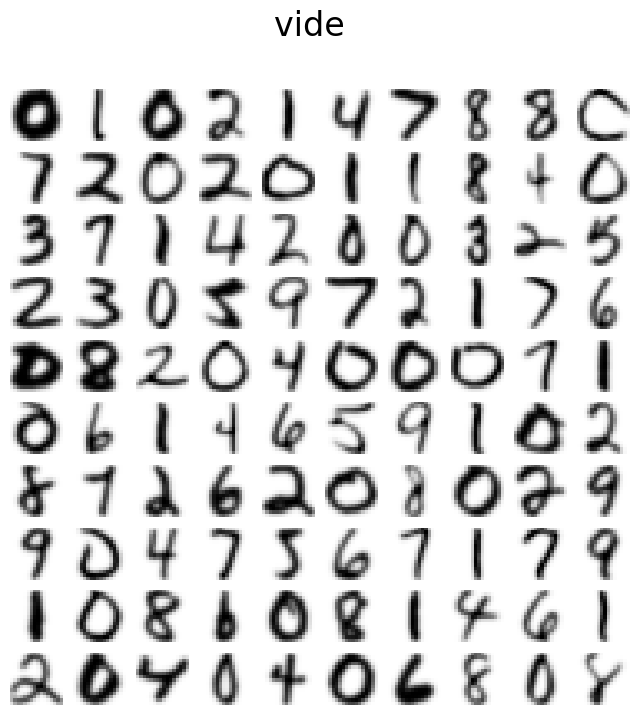

In [5]:
plot_digits(train_digits,'vide')

### 1.1. Normaliser les données

**Q1** Vérifier les valeurs contenues dans les vecteurs représentant chaque digits (type, échelle numérique). Puis normaliser ces valeurs entre 0 et 1. Cette normalisation s'effectuera par rapport à l'ensemble d'apprentissage. 

In [6]:
train_digits[0]

array([-0.999757, -0.994805, -0.956778, -0.808782, -0.519827, -0.226897,
       -0.029382,  0.033721,  0.131772,  0.364378,  0.337242, -0.135964,
       -0.644883, -0.91572 , -0.990534, -0.999587, -0.997413, -0.953742,
       -0.737557, -0.240684,  0.33655 ,  0.633674,  0.737479,  0.764434,
        0.804754,  0.900306,  0.882621,  0.584961, -0.009195, -0.639614,
       -0.939003, -0.996679, -0.98951 , -0.839082, -0.288137,  0.454885,
        0.861296,  0.966469,  0.983059,  0.985212,  0.987938,  0.994554,
        0.990601,  0.916269,  0.545794, -0.230355, -0.826076, -0.988977,
       -0.964579, -0.667479,  0.114467,  0.780724,  0.980812,  0.998349,
        0.994594,  0.982907,  0.976084,  0.976824,  0.984484,  0.978997,
        0.772693,  0.079766, -0.694132, -0.971245, -0.874486, -0.355444,
        0.473027,  0.911003,  0.994712,  0.990057,  0.912256,  0.733869,
        0.63245 ,  0.643972,  0.767921,  0.929515,  0.877858,  0.371355,
       -0.472137, -0.913407, -0.722361,  0.055149, 

Les valeurs contenus dans un vecteur sont comprises entre -1 et 1.

In [7]:
#normaliser les données
def normalise_V1(x):
    return (x+1)/2

In [27]:
normalise_V1(train_digits[0])
    

array([1.215000e-04, 2.597500e-03, 2.161100e-02, 9.560900e-02,
       2.400865e-01, 3.865515e-01, 4.853090e-01, 5.168605e-01,
       5.658860e-01, 6.821890e-01, 6.686210e-01, 4.320180e-01,
       1.775585e-01, 4.214000e-02, 4.733000e-03, 2.065000e-04,
       1.293500e-03, 2.312900e-02, 1.312215e-01, 3.796580e-01,
       6.682750e-01, 8.168370e-01, 8.687395e-01, 8.822170e-01,
       9.023770e-01, 9.501530e-01, 9.413105e-01, 7.924805e-01,
       4.954025e-01, 1.801930e-01, 3.049850e-02, 1.660500e-03,
       5.245000e-03, 8.045900e-02, 3.559315e-01, 7.274425e-01,
       9.306480e-01, 9.832345e-01, 9.915295e-01, 9.926060e-01,
       9.939690e-01, 9.972770e-01, 9.953005e-01, 9.581345e-01,
       7.728970e-01, 3.848225e-01, 8.696200e-02, 5.511500e-03,
       1.771050e-02, 1.662605e-01, 5.572335e-01, 8.903620e-01,
       9.904060e-01, 9.991745e-01, 9.972970e-01, 9.914535e-01,
       9.880420e-01, 9.884120e-01, 9.922420e-01, 9.894985e-01,
       8.863465e-01, 5.398830e-01, 1.529340e-01, 1.4377

### 1.2 Bruiter les données

Dans un second temps on va bruiter les digits. L'objectif sera de déterminer les composantes principales des données bruitées d'apprentissage et grâce à celles-ci débruiter les données de test.

Exécuter la cellule ci-dessous et vérifier que vous avez bien bruité vos données.

In [15]:
X_train = normalise_V1(train_digits)
X_test = normalise_V1(test_digits)

In [16]:
rng = np.random.RandomState(0)
noise = rng.normal(scale=0.25, size=X_test.shape)
test_digits_noisy = X_test + noise

noise = rng.normal(scale=0.25, size=X_train.shape)
train_digits_noisy = X_train + noise

### 1.3. Calculer les similarités

**Q2** Définir deux fonctions qui calculent la distance de manhattan et la similarité cosinus entre un vecteur de dimension $n$ et une matrice de dimension $m\times n$ et retournent un vecteur de similarités de dimension $m$. A minima vos fonctions doivent prendre en compte $m=1$.

**Q3** Afficher les matrices de similarité sur les données de test avant et après ajout du bruit en utilisant les deux métriques (manhattan et cosine). Vous penserez à ajouter l'échelle des couleurs.

In [28]:
def manhattan(x, y):
    return np.sum(np.abs(x-y))

def sim_cos(x,y):
    return (x*y)/np.abs(x)*np.abs(y)

In [ ]:
# similarité


**Q4** Que pouvez-vous conclure sur les matrices de similarités avant et après bruitage ? Vous pouvez éventuellement ajouter des mesures additionnelles pour argumenter votre réponse.

## Partie 2 : débruiter avec un ACP

### 2.1. Faire une ACP et afficher le résultat

**Q1** A l'aide de `sklearn` réaliser une ACP afin de ne récupérer que les 32 composantes ayant une entropie maximum à partir de la matrice de digits bruité de l'ensemble d'apprentissage.
La matrice obtenue a une dimension (1000,32), préciser à quoi correspondent ces dimensions.

**Q2** Afficher sur un nuage de points les deux composantes principales, vous pourrez faire apparaitre des couleurs correspondantes aux chiffres.

In [19]:
def nuage(x1, x2, y, dim1='dim1', dim2='dim2'):
    plt.scatter(x1, x2, c=y)
    plt.title('nuage de points')
    plt.xlabel(dim1)
    plt.ylabel(dim2)
    plt.show()

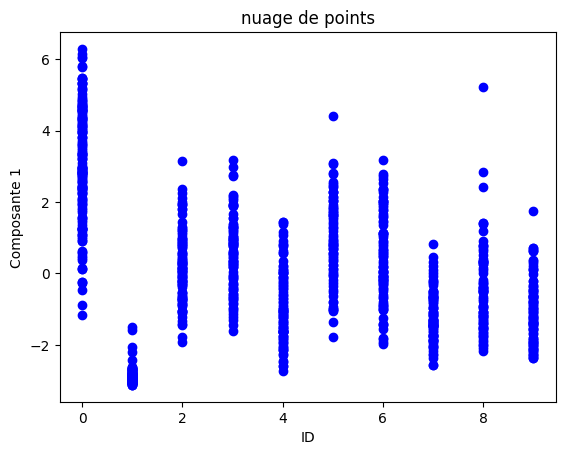

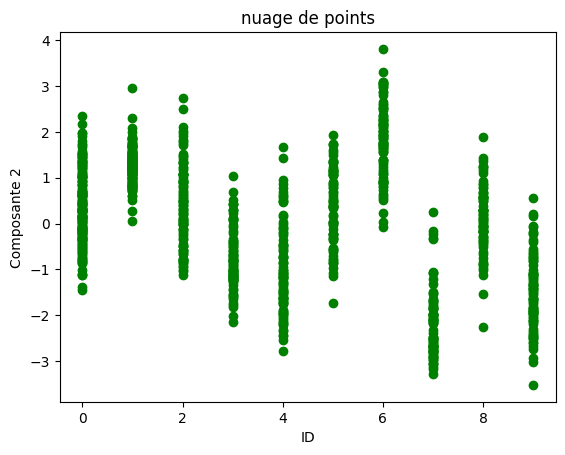

In [32]:
from sklearn.decomposition import PCA
# transformer les identifiants nom_prenom des locuteurs en suite d'entiers.
digits = np.unique(train_ids,return_inverse=True)[1]

pca = PCA(n_components=32, svd_solver= 'arpack')
xp = pca.fit_transform(X_train)
xp.shape
# nuage()
nuage(digits, np.hsplit(xp, 32)[0], 'blue', 'ID', 'Composante 1')
nuage(digits, np.hsplit(xp, 32)[1], 'green', 'ID', 'Composante 2')

### 2.2. Interpréter

Sur le nuage de points obtenu avec les deux premières composantes principales, on ne voit pas de regroupement évident en digits. Il n'est pas évident d'interpréter les deux premières composantes principales



**Q1** Donner la contribution en pourcentage par rapport à l'inertie totale de la première composante, puis des 32 premières composantes. Donner une interprétation du manque de discrimination entre les digits avec la PCA.

In [29]:
def inertie(data):
    N=data.shape[0]
    print(np.mean(data,axis=0))
    return (1/N)*np.sum(manhattan(data,np.mean(data,axis=0)))
inertie(xp)

[ 9.23705556e-16 -6.53699317e-16 -5.11590770e-16  2.41584530e-16
  1.35003120e-15 -2.13162821e-17  9.45021839e-16  7.67386155e-16
  1.05870868e-15  3.55271368e-16 -1.24344979e-17  8.02913291e-16
 -1.03028697e-16  8.17124146e-17  4.88498131e-16 -1.35003120e-16
 -4.52970994e-16  3.70370401e-16  5.43565193e-16 -7.30082661e-16
  1.11022302e-17 -2.48689958e-16 -8.88178420e-18  5.25801624e-16
 -2.57571742e-16  8.95283847e-16 -7.99360578e-16 -1.77635684e-18
 -8.47322212e-16  6.28830321e-16  1.22124533e-17  1.59428026e-16]


29.29155781898172

Le manque de discrimination se fait car les valeurs sont très proche de 0.

**Q2** Donner la dimension de la matrice de passage correspondant à la décomposition de la matrice correspondante aux digits.


**Q3** Parmi les 256 dimensions du vecteur original quelle dimension contribue le plus à la composante principale ?

### 2.3 Débruiter

**Q4** A partir de la matrice de passage, vous allez pouvoir débruiter les digits de l'ensemble de test `test_digits_noisy`. Pour cela il faut :
1. projeter la matrice de test dans l'espace des 32 composantes (utiliser `transform`)
2. puis à nouveau reprojeter dans l'espace d'origine (utiliser `inverse_transform`)

Les nouvelles images doivent être moins bruitées que les premières.

### 2.3. Calculer un taux d'erreur sur les vecteurs

Pour un digit inconnu de la partition de test, on cherchera l'identifiant du digit de la partition d'apprentissage qui a le plus grand score de similarité, ou la plus petite distance. On considère alors que cet identifiant correspond au digit prédit.

En comparant l'identifiant du digit prédit avec celui du digit de référence, on peut évaluer les performances de notre approche en calculant un taux d'erreur (nombre de bonnes réponses / nombre de digits inconnus).

Vous testerez avec les deux métriques similarité cosinus et distance de manhattan
Vous devrez trouver des taux autour ceux donnés dans le tableau ci-dessous.

| Similarité | test original | test bruité | test débruité |
|--- | --- | --- | --- |
| Manhattan | 0.95 | 0.55 | 0.54 |
| Cosine    | 0.36 | 0.82 | 0.79 |

**Q5** Qu'en concluez-vous ?